## This code get the EURUSD weekly data, then clean data and build model to evaluation next week trend. Then save it and create a CSV file as an input to MQL expert that i have wrote before. 
### data starts from 2000,1,1 till 2025,1,1

In [1]:
# Importing Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import random
import talib as ta

In [26]:
# Importing dataset
#dataset = pd.read_csv('D:/AmirAgah/New_Methods_Courses/Data/GBPUSD_DailyData.csv')
dataset = pd.read_csv('D:/AmirAgah/New_Methods_Courses/Data/EURUSD_WeeklyData.csv')

In [27]:
len(dataset)

7001

In [28]:
dataset.iloc[5689]

Date      1998.05.10 00:00:00
Open                   1.1125
High                    1.117
Low                    1.1012
Close                  1.1035
Volume                    722
Name: 5689, dtype: object

In [29]:
dataset['Open'].shift(1).head()

0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
Name: Open, dtype: float64

In [30]:
dataset = dataset.iloc[5689:]

In [31]:
len(dataset)

1312

In [32]:
dataset.head()

,Date,Open,High,Low,Close,Volume
5689,1998.05.10 00:00:00,1.1125,1.1170,1.1012,1.1035,722
5690,1998.05.17 00:00:00,1.1030,1.1216,1.0993,1.1185,557
5691,1998.05.24 00:00:00,1.1170,1.1195,1.0991,1.1034,955
5692,1998.05.31 00:00:00,1.1010,1.1188,1.1010,1.1110,575
5693,1998.06.07 00:00:00,1.1090,1.1123,1.0894,1.0942,680


In [33]:
# Drop the rows with zero volume traded
dataset = dataset.drop(dataset[dataset['Volume'] == 0].index)

# Convert the 'Time' column into pandas datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])
# Set the Time column as index
#dataset.set_index('Date', inplace=True)

In [34]:
dataset.head()

,Date,Open,High,Low,Close,Volume
5689,1998-05-10,1.1125,1.1170,1.1012,1.1035,722
5690,1998-05-17,1.1030,1.1216,1.0993,1.1185,557
5691,1998-05-24,1.1170,1.1195,1.0991,1.1034,955
5692,1998-05-31,1.1010,1.1188,1.1010,1.1110,575
5693,1998-06-07,1.1090,1.1123,1.0894,1.0942,680


In [35]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

### Here few indicator will be added to our dataframe.

In [36]:
#Preparing the dataset
dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Close'] - dataset['Open']
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
dataset['50day MA'] = dataset['Close'].shift(1).rolling(window = 50).mean()
dataset['Std_dev']= dataset['Close'].rolling(5).std()
# Create RSI and stochastic
dataset['RSI-9'] = ta.RSI(dataset['Close'].values, timeperiod = 9)
dataset['slowk'],dataset['slowd'] = ta.STOCH(high=dataset['High'].values, low=dataset['Low'].values, 
                                             close=dataset['Close'].values, fastk_period=5, slowk_period=3, 
                                             slowk_matype=0, slowd_period=3, slowd_matype=0)
#STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

In [37]:
dataset.head()

,Date,Open,High,Low,Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,50day MA,Std_dev,RSI-9,slowk,slowd
5689,1998-05-10,1.1125,1.1170,1.1012,1.1035,722,0.0158,-0.0090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5690,1998-05-17,1.1030,1.1216,1.0993,1.1185,557,0.0223,0.0155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5691,1998-05-24,1.1170,1.1195,1.0991,1.1034,955,0.0204,-0.0136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5692,1998-05-31,1.1010,1.1188,1.1010,1.1110,575,0.0178,0.0100,1.108467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5693,1998-06-07,1.1090,1.1123,1.0894,1.0942,680,0.0229,-0.0148,1.110967,NaN,NaN,NaN,0.00913,NaN,NaN,NaN


#### After we creating indicators now we have few NULL cells, we will drop them all.
#### here we create our target column, named "Price_Rise"

In [38]:
#--- 1 means RISE and 0 means down
dataset['Price_Rise'] = np.where(dataset['Close'].shift(1) > dataset['Open'].shift(1), 0, 1)

In [39]:
dataset[['Date','Close','Open','Price_Rise']].head()

,Date,Close,Open,Price_Rise
5689,1998-05-10,1.1035,1.1125,1
5690,1998-05-17,1.1185,1.1030,1
5691,1998-05-24,1.1034,1.1170,0
5692,1998-05-31,1.1110,1.1010,1
5693,1998-06-07,1.0942,1.1090,0


In [40]:
dataset.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
H-L            0
O-C            0
3day MA        3
10day MA      10
30day MA      30
50day MA      50
Std_dev        4
RSI-9          9
slowk          8
slowd          8
Price_Rise     0
dtype: int64

In [41]:
dataset = dataset.dropna()

In [42]:
len(dataset)

1262

<Axes: xlabel='Price_Rise', ylabel='count'>

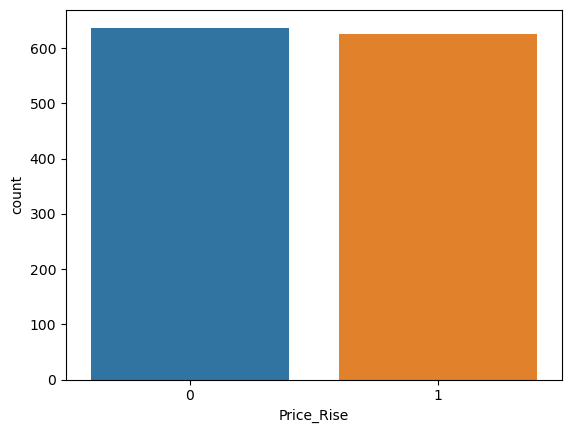

In [43]:
# Some data visualization
import seaborn as sns
sns.countplot(x='Price_Rise', data=dataset)

In [44]:
dataset.corr(numeric_only=True)['Price_Rise'].sort_values()

slowk        -0.372813
RSI-9        -0.309261
slowd        -0.217342
Open         -0.075255
Low          -0.074466
Close        -0.074164
High         -0.073065
3day MA      -0.024930
Std_dev      -0.016746
10day MA     -0.007969
30day MA     -0.000783
H-L           0.001184
50day MA      0.004384
O-C           0.011679
Volume        0.039879
Price_Rise    1.000000
Name: Price_Rise, dtype: float64

#### Dataset for training and testing preparation 

In [45]:
# Split data
# X = dataset.drop(['Price_Rise'],axis=1).values
X = dataset.drop(['Date','Open','Close','High','Low','Price_Rise'],axis=1).values
y = dataset['Price_Rise'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [46]:
# Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# Create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

n_features = X_train.shape[1]
X_train.shape

(1009, 11)

In [48]:
# Shape in this array must be as input for model.
model = Sequential()

model.add(Dense(n_features, activation='gelu'))
#model.add(Dropout(0.2))
model.add(Dense(n_features, activation='gelu'))
#model.add(Dropout(0.2))
model.add(Dense(n_features, activation='gelu'))
#model.add(Dropout(0.2))
#model.add(Dense(n_features, activation='gelu'))
#model.add(Dropout(0.2))
#model.add(Dense(n_features, activation='gelu'))
#model.add(Dropout(0.2))
#model.add(Dense(n_features, activation='gelu'))
#model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
# Create call back
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=25)
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop],validation_split=0.2)

Epoch 1/600
32/32 [==============================] - 2s 10ms/step - loss: 0.6913 - val_loss: 0.6896
Epoch 2/600
32/32 [==============================] - 0s 4ms/step - loss: 0.6858 - val_loss: 0.6827
Epoch 3/600
32/32 [==============================] - 0s 3ms/step - loss: 0.6790 - val_loss: 0.6757
Epoch 4/600
32/32 [==============================] - 0s 3ms/step - loss: 0.6692 - val_loss: 0.6662
Epoch 5/600
32/32 [==============================] - 0s 3ms/step - loss: 0.6582 - val_loss: 0.6527
Epoch 6/600
32/32 [==============================] - 0s 4ms/step - loss: 0.6489 - val_loss: 0.6423
Epoch 7/600
32/32 [==============================] - 0s 3ms/step - loss: 0.6422 - val_loss: 0.6410
Epoch 8/600
32/32 [==============================] - 0s 3ms/step - loss: 0.6354 - val_loss: 0.6378
Epoch 9/600
32/32 [==============================] - 0s 3ms/step - loss: 0.6308 - val_loss: 0.6350
Epoch 10/600
32/32 [==============================] - 0s 3ms/step - loss: 0.6257 - val_loss: 0.6295
Epoch 11

32/32 [==============================] - 0s 5ms/step - loss: 0.4700 - val_loss: 0.5488
Epoch 84/600
32/32 [==============================] - 0s 4ms/step - loss: 0.4708 - val_loss: 0.5484
Epoch 85/600
32/32 [==============================] - 0s 5ms/step - loss: 0.4768 - val_loss: 0.5387
Epoch 86/600
32/32 [==============================] - 0s 4ms/step - loss: 0.4697 - val_loss: 0.5437
Epoch 87/600
32/32 [==============================] - 0s 3ms/step - loss: 0.4760 - val_loss: 0.5769
Epoch 88/600
32/32 [==============================] - 0s 3ms/step - loss: 0.4773 - val_loss: 0.5476
Epoch 89/600
32/32 [==============================] - 0s 3ms/step - loss: 0.4667 - val_loss: 0.5504
Epoch 90/600
32/32 [==============================] - 0s 2ms/step - loss: 0.4697 - val_loss: 0.5482
Epoch 91/600
32/32 [==============================] - 0s 3ms/step - loss: 0.4678 - val_loss: 0.5485
Epoch 92/600
32/32 [==============================] - 0s 2ms/step - loss: 0.4686 - val_loss: 0.5464
Epoch 93/600


In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 408 (1.59 KB)
Trainable params: 408 (1.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

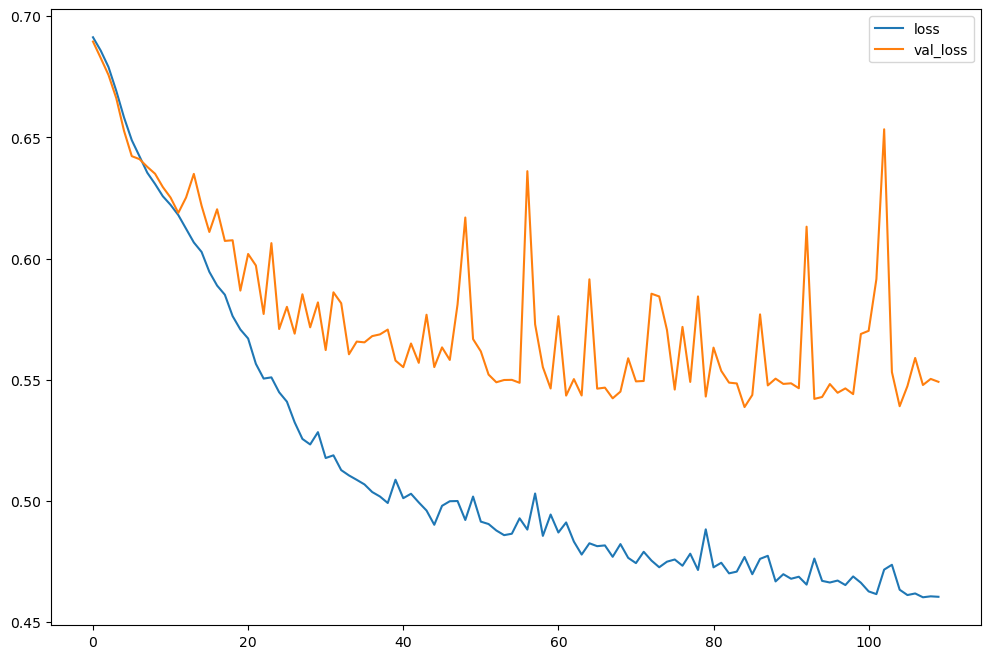

In [51]:
# See result
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(12,8))

In [52]:
# Predict
#predictions = model.predict_classes(X_test)
predictions = (model.predict(X_test) > 0.5).astype("int32")
#predictions = np.argmax(model.predict(X_test), axis=-1)
#predictions = model.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


8/8 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       140
           1       0.66      0.78      0.71       113

    accuracy                           0.72       253
   macro avg       0.72      0.73      0.72       253
weighted avg       0.73      0.72      0.72       253

[[94 46]
 [25 88]]


In [53]:
y_test.shape

(253,)

In [54]:
y_hat = y_test.reshape(-1,1)

In [55]:
d = np.array([predictions[:,0],y_test])

In [56]:
res_pd = pd.DataFrame(d).transpose().tail(20)
res_pd.columns=['pred','real']
res_pd

,pred,real
233,0,0
234,0,0
235,0,0
236,0,0
237,1,1
238,0,0
239,1,0
240,0,0
241,1,1
242,1,1


In [57]:
# Save model
from keras.models import load_model

model.save('D:/AmirAgah/Model_Saved/ANN_EURUSD_Weekly.hdf5')
#model.save('D:/AmirAgah/Project/Final_Prediction_models/ANN_CLASSIFICATION_KERAS/ANN_GBPUSD_Daily_Classification.h5')
#model.save('ANN_GBPUSD_DAILY.h5')

C:\Users\Amir Agah\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Predict for all Data. 
Here we predict all the data that we have with the saved model, then we drop all columns and create a new data frame 
that includes From_Date, To_Date and Riseing Predictions. Then we save it as a CSV file and send it to MQL.

In [58]:
dataset.head()

,Date,Open,High,Low,Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,50day MA,Std_dev,RSI-9,slowk,slowd,Price_Rise
5739,1999-05-09,1.0730,1.0833,1.0602,1.0657,31240,0.0231,-0.0073,1.064700,1.07608,1.135217,1.126940,0.007298,33.243730,34.684137,24.857198,0
5740,1999-05-16,1.0675,1.0714,1.0544,1.0591,28052,0.0170,-0.0084,1.066333,1.07447,1.130867,1.126184,0.007389,30.662608,37.335594,33.213264,1
5741,1999-05-23,1.0562,1.0647,1.0397,1.0429,30043,0.0250,-0.0133,1.066867,1.07133,1.125727,1.124996,0.012056,25.249208,18.911652,30.310461,1
5742,1999-05-30,1.0456,1.0487,1.0270,1.0376,32295,0.0217,-0.0080,1.055900,1.06673,1.119917,1.123786,0.015856,23.708640,14.143378,23.463541,1
5743,1999-06-06,1.0359,1.0559,1.0260,1.0513,31422,0.0299,0.0154,1.046533,1.06284,1.114497,1.122318,0.011472,35.205261,23.440245,18.831758,1


In [59]:
new_dataset = dataset
new_dataset.reset_index(drop=True,inplace=True)
new_dataset

,Date,Open,High,Low,Close,Volume,H-L,O-C,3day MA,10day MA,30day MA,50day MA,Std_dev,RSI-9,slowk,slowd,Price_Rise
0,1999-05-09,1.0730,1.0833,1.0602,1.0657,31240,0.0231,-0.0073,1.064700,1.07608,1.135217,1.126940,0.007298,33.243730,34.684137,24.857198,0
1,1999-05-16,1.0675,1.0714,1.0544,1.0591,28052,0.0170,-0.0084,1.066333,1.07447,1.130867,1.126184,0.007389,30.662608,37.335594,33.213264,1
2,1999-05-23,1.0562,1.0647,1.0397,1.0429,30043,0.0250,-0.0133,1.066867,1.07133,1.125727,1.124996,0.012056,25.249208,18.911652,30.310461,1
3,1999-05-30,1.0456,1.0487,1.0270,1.0376,32295,0.0217,-0.0080,1.055900,1.06673,1.119917,1.123786,0.015856,23.708640,14.143378,23.463541,1
4,1999-06-06,1.0359,1.0559,1.0260,1.0513,31422,0.0299,0.0154,1.046533,1.06284,1.114497,1.122318,0.011472,35.205261,23.440245,18.831758,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2023-06-11,1.0747,1.0970,1.0732,1.0940,33523,0.0238,0.0193,1.072567,1.08740,1.072847,1.045038,0.009470,62.078424,44.638110,24.215887,0
1258,2023-06-18,1.0938,1.1011,1.0843,1.0894,33543,0.0168,-0.0044,1.079767,1.08782,1.074917,1.046066,0.010714,57.629264,62.436558,41.128698,0
1259,2023-06-25,1.0901,1.0976,1.0834,1.0910,35990,0.0142,0.0009,1.086067,1.08683,1.076613,1.047488,0.010548,58.785126,77.748832,61.607833,1
1260,2023-07-02,1.0911,1.0972,1.0833,1.0966,35276,0.0139,0.0055,1.091467,1.08605,1.077847,1.049138,0.008492,62.782774,76.377196,72.187528,0


In [60]:
df_for_predict = new_dataset.drop(['Open','Close','High','Low','Price_Rise'],axis=1)

In [61]:
df_for_predict.head()

,Date,Volume,H-L,O-C,3day MA,10day MA,30day MA,50day MA,Std_dev,RSI-9,slowk,slowd
0,1999-05-09,31240,0.0231,-0.0073,1.064700,1.07608,1.135217,1.126940,0.007298,33.243730,34.684137,24.857198
1,1999-05-16,28052,0.0170,-0.0084,1.066333,1.07447,1.130867,1.126184,0.007389,30.662608,37.335594,33.213264
2,1999-05-23,30043,0.0250,-0.0133,1.066867,1.07133,1.125727,1.124996,0.012056,25.249208,18.911652,30.310461
3,1999-05-30,32295,0.0217,-0.0080,1.055900,1.06673,1.119917,1.123786,0.015856,23.708640,14.143378,23.463541
4,1999-06-06,31422,0.0299,0.0154,1.046533,1.06284,1.114497,1.122318,0.011472,35.205261,23.440245,18.831758


In [62]:
df_for_predict['Date'].iloc[72].day

24

In [63]:
#### Buikd To_Date column

In [64]:
df_for_predict['To_Date'] = df_for_predict['Date'].shift(-1)
df_for_predict = df_for_predict.dropna()

In [65]:
df_for_predict

,Date,Volume,H-L,O-C,3day MA,10day MA,30day MA,50day MA,Std_dev,RSI-9,slowk,slowd,To_Date
0,1999-05-09,31240,0.0231,-0.0073,1.064700,1.07608,1.135217,1.126940,0.007298,33.243730,34.684137,24.857198,1999-05-16
1,1999-05-16,28052,0.0170,-0.0084,1.066333,1.07447,1.130867,1.126184,0.007389,30.662608,37.335594,33.213264,1999-05-23
2,1999-05-23,30043,0.0250,-0.0133,1.066867,1.07133,1.125727,1.124996,0.012056,25.249208,18.911652,30.310461,1999-05-30
3,1999-05-30,32295,0.0217,-0.0080,1.055900,1.06673,1.119917,1.123786,0.015856,23.708640,14.143378,23.463541,1999-06-06
4,1999-06-06,31422,0.0299,0.0154,1.046533,1.06284,1.114497,1.122318,0.011472,35.205261,23.440245,18.831758,1999-06-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2023-06-04,29709,0.0119,0.0042,1.074433,1.08834,1.071527,1.044648,0.005911,46.856184,16.311424,12.263449,2023-06-11
1257,2023-06-11,33523,0.0238,0.0193,1.072567,1.08740,1.072847,1.045038,0.009470,62.078424,44.638110,24.215887,2023-06-18
1258,2023-06-18,33543,0.0168,-0.0044,1.079767,1.08782,1.074917,1.046066,0.010714,57.629264,62.436558,41.128698,2023-06-25
1259,2023-06-25,35990,0.0142,0.0009,1.086067,1.08683,1.076613,1.047488,0.010548,58.785126,77.748832,61.607833,2023-07-02


In [66]:
df_for_predict.columns

Index(['Date', 'Volume', 'H-L', 'O-C', '3day MA', '10day MA', '30day MA',
       '50day MA', 'Std_dev', 'RSI-9', 'slowk', 'slowd', 'To_Date'],
      dtype='object')

In [67]:
# prepair data for predicting by model

X_for_prediction = df_for_predict.drop(['Date','To_Date'],axis=1).values
#y = dataset['Price_Rise'].values

In [68]:
X_for_prediction.shape

(1261, 11)

In [69]:
scaleld_X_for_prediction = scaler.transform(X_for_prediction)

In [70]:
scaleld_X_for_prediction

array([[0.01864453, 0.14084507, 0.45515846, ..., 0.29744745, 0.34527263,
        0.22351547],
       [0.01587401, 0.09311424, 0.44774107, ..., 0.26521451, 0.3726965 ,
        0.31406504],
       [0.01760428, 0.15571205, 0.41469993, ..., 0.19761218, 0.1821387 ,
        0.28260914],
       ...,
       [0.02064595, 0.0915493 , 0.47471342, ..., 0.60197302, 0.63231436,
        0.39983974],
       [0.0227725 , 0.07120501, 0.51045179, ..., 0.61640738, 0.79068835,
        0.6217596 ],
       [0.022152  , 0.06885759, 0.54146999, ..., 0.66632985, 0.7765016 ,
        0.73640528]])

In [71]:
#Model Load
prediction_model = load_model('D:/AmirAgah/Model_Saved/ANN_EURUSD_Weekly.hdf5')

In [72]:
#give a data _ here i may see the result of model probaility.
prediction_last_data = (prediction_model.predict(scaleld_X_for_prediction)>0.5).astype('int32')

40/40 [==============================] - 0s 1ms/step


In [73]:
predicted_values = pd.DataFrame(prediction_last_data)
predicted_values.columns = (['Predict_values'])
predicted_values

,Predict_values
0,0
1,0
2,1
3,1
4,1
...,...
1256,1
1257,0
1258,0
1259,0


In [74]:
df_for_predict

,Date,Volume,H-L,O-C,3day MA,10day MA,30day MA,50day MA,Std_dev,RSI-9,slowk,slowd,To_Date
0,1999-05-09,31240,0.0231,-0.0073,1.064700,1.07608,1.135217,1.126940,0.007298,33.243730,34.684137,24.857198,1999-05-16
1,1999-05-16,28052,0.0170,-0.0084,1.066333,1.07447,1.130867,1.126184,0.007389,30.662608,37.335594,33.213264,1999-05-23
2,1999-05-23,30043,0.0250,-0.0133,1.066867,1.07133,1.125727,1.124996,0.012056,25.249208,18.911652,30.310461,1999-05-30
3,1999-05-30,32295,0.0217,-0.0080,1.055900,1.06673,1.119917,1.123786,0.015856,23.708640,14.143378,23.463541,1999-06-06
4,1999-06-06,31422,0.0299,0.0154,1.046533,1.06284,1.114497,1.122318,0.011472,35.205261,23.440245,18.831758,1999-06-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2023-06-04,29709,0.0119,0.0042,1.074433,1.08834,1.071527,1.044648,0.005911,46.856184,16.311424,12.263449,2023-06-11
1257,2023-06-11,33523,0.0238,0.0193,1.072567,1.08740,1.072847,1.045038,0.009470,62.078424,44.638110,24.215887,2023-06-18
1258,2023-06-18,33543,0.0168,-0.0044,1.079767,1.08782,1.074917,1.046066,0.010714,57.629264,62.436558,41.128698,2023-06-25
1259,2023-06-25,35990,0.0142,0.0009,1.086067,1.08683,1.076613,1.047488,0.010548,58.785126,77.748832,61.607833,2023-07-02


In [75]:
print(predicted_values.shape)
print(df_for_predict.shape)

(1261, 1)
(1261, 13)


In [76]:
# Contact with the other Data Framedf_for_predict
predicted_values_dataframe = pd.concat([df_for_predict, predicted_values],axis=1)
#predicted_values_dataframe.iloc[1075:1080]
predicted_values_dataframe

,Date,Volume,H-L,O-C,3day MA,10day MA,30day MA,50day MA,Std_dev,RSI-9,slowk,slowd,To_Date,Predict_values
0,1999-05-09,31240,0.0231,-0.0073,1.064700,1.07608,1.135217,1.126940,0.007298,33.243730,34.684137,24.857198,1999-05-16,0
1,1999-05-16,28052,0.0170,-0.0084,1.066333,1.07447,1.130867,1.126184,0.007389,30.662608,37.335594,33.213264,1999-05-23,0
2,1999-05-23,30043,0.0250,-0.0133,1.066867,1.07133,1.125727,1.124996,0.012056,25.249208,18.911652,30.310461,1999-05-30,1
3,1999-05-30,32295,0.0217,-0.0080,1.055900,1.06673,1.119917,1.123786,0.015856,23.708640,14.143378,23.463541,1999-06-06,1
4,1999-06-06,31422,0.0299,0.0154,1.046533,1.06284,1.114497,1.122318,0.011472,35.205261,23.440245,18.831758,1999-06-13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2023-06-04,29709,0.0119,0.0042,1.074433,1.08834,1.071527,1.044648,0.005911,46.856184,16.311424,12.263449,2023-06-11,1
1257,2023-06-11,33523,0.0238,0.0193,1.072567,1.08740,1.072847,1.045038,0.009470,62.078424,44.638110,24.215887,2023-06-18,0
1258,2023-06-18,33543,0.0168,-0.0044,1.079767,1.08782,1.074917,1.046066,0.010714,57.629264,62.436558,41.128698,2023-06-25,0
1259,2023-06-25,35990,0.0142,0.0009,1.086067,1.08683,1.076613,1.047488,0.010548,58.785126,77.748832,61.607833,2023-07-02,0


In [77]:
predicted_values_dataframe.columns

Index(['Date', 'Volume', 'H-L', 'O-C', '3day MA', '10day MA', '30day MA',
       '50day MA', 'Std_dev', 'RSI-9', 'slowk', 'slowd', 'To_Date',
       'Predict_values'],
      dtype='object')

In [78]:
dataframe_ready_for_mql = predicted_values_dataframe.drop(['Volume', 'H-L', 'O-C', '3day MA', '10day MA', '30day MA',
       '50day MA', 'RSI-9', 'slowk', 'slowd','Std_dev'],axis=1)
dataframe_ready_for_mql

,Date,To_Date,Predict_values
0,1999-05-09,1999-05-16,0
1,1999-05-16,1999-05-23,0
2,1999-05-23,1999-05-30,1
3,1999-05-30,1999-06-06,1
4,1999-06-06,1999-06-13,1
...,...,...,...
1256,2023-06-04,2023-06-11,1
1257,2023-06-11,2023-06-18,0
1258,2023-06-18,2023-06-25,0
1259,2023-06-25,2023-07-02,0


In [80]:
dataframe_ready_for_mql.to_csv('D:/AmirAgah/Model_Saved/mql_csv_data_eurusd.csv',sep=";")

In [81]:
dataframe_ready_for_mql.to_csv('D:/AmirAgah/Model_Saved/mql_csv_data02_eurusd.csv',sep=",")

In [82]:
dataframe_ready_for_mql.to_csv('D:/AmirAgah/Model_Saved/mql_csv_data03_eurusd.csv',sep="@")

In [83]:
### END HERE.

# Prediction for one entry data .

For prediction i have to do below items :
- load model
- make a features as input model from data
- predict by model

In [84]:
# befor makoing that i do the below procedure to find out next day trned .
new_X_test = X_test[len(X_test)-5:][:]

(model.predict(new_X_test)>0.5).astype('int32')

1/1 [==============================] - 0s 23ms/step


array([[0],
       [1],
       [0],
       [0],
       [0]])

In [85]:
# I try to find solution for make new data from 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1262 non-null   datetime64[ns]
 1   Open        1262 non-null   float64       
 2   High        1262 non-null   float64       
 3   Low         1262 non-null   float64       
 4   Close       1262 non-null   float64       
 5   Volume      1262 non-null   int64         
 6   H-L         1262 non-null   float64       
 7   O-C         1262 non-null   float64       
 8   3day MA     1262 non-null   float64       
 9   10day MA    1262 non-null   float64       
 10  30day MA    1262 non-null   float64       
 11  50day MA    1262 non-null   float64       
 12  Std_dev     1262 non-null   float64       
 13  RSI-9       1262 non-null   float64       
 14  slowk       1262 non-null   float64       
 15  slowd       1262 non-null   float64       
 16  Price_Rise  1262 non-nul

In [86]:
new_item = dataset.drop(['Date','Open','Close','High','Low','Price_Rise'],axis=1).iloc[len(dataset)-1]

In [87]:
new_item = new_item.values.reshape(1,-1)

In [88]:
new_item.shape

(1, 11)

In [89]:
scaleld_item = scaler.transform(new_item)

In [90]:
#Model Load
#give a data _ here i may see the result of model probaility.
prediction_last_item = (model.predict(new_item)>0.5).astype('int32')

1/1 [==============================] - 0s 21ms/step


In [91]:
prediction_last_item

array([[1]])